# 导入必要的包

In [12]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
import pandas as pd # 读取数据
from torch import nn

# 读取并加载数据


In [13]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

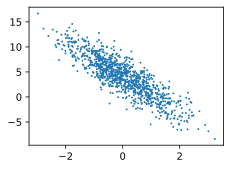

In [21]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);
# scatter 画散点图
# detach() 从计算图中分离出来
d2l.plt.show()

In [14]:
def load_array(data_arrays, batch_size, is_train=True):
    """
    构造一个 PyTorch 数据迭代器。

    根据给定的数据数组创建一个 `DataLoader`，用于批量加载数据，支持随机打乱数据顺序。

    参数:
        data_arrays (tuple[torch.Tensor, ...]): 包含特征和标签的元组，每个元素是一个 `torch.Tensor`。
        batch_size (int): 每个小批量的样本数量。
        is_train (bool): 是否将数据打乱（`True` 表示训练模式，数据会随机打乱；`False` 表示测试模式，数据按顺序加载）。

    返回:
        torch.utils.data.DataLoader: 一个数据加载器对象，用于按批量加载数据。
    """
    # 使用 TensorDataset 将特征和标签封装成一个数据集对象
    dataset = data.TensorDataset(*data_arrays)

    # 创建 DataLoader，指定批量大小和是否随机打乱数据
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 检验迭代器是否正常工作

In [15]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.4580, -0.1511],
         [-0.6862, -0.8326],
         [ 0.8614, -0.1152],
         [-0.0544, -0.0614],
         [-0.8641, -0.0686],
         [ 0.4449, -1.2377],
         [ 0.4087, -0.7920],
         [ 0.0682, -0.1543],
         [ 0.3605,  0.3003],
         [-1.7035,  1.3380]]),
 tensor([[ 3.7945],
         [ 5.6668],
         [ 6.2983],
         [ 4.3053],
         [ 2.6943],
         [ 9.3128],
         [ 7.7109],
         [ 4.8633],
         [ 3.8993],
         [-3.7673]])]

# 定义线性模型

In [16]:
in_features = 2
out_features = 1
net = nn.Sequential(nn.Linear(in_features, out_features))
# nn是神经网络的缩写
# Sequential是一个有序容器，网络层将按照在传入Sequential的顺序依次被添加到计算图中执行
# Linear是一个全连接层，它接收一个输入张量，然后计算输出

# 初始化模型参数

In [17]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

# 定义损失函数

In [18]:
loss = nn.MSELoss()

# 定义优化算法

In [19]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
# parameters()返回一个包含模型所有参数的迭代器

# 训练

In [20]:
num_epochs = 3  # 设置训练的总轮数
for epoch in range(num_epochs):  # 遍历每一轮训练
    for X, y in data_iter:  # 遍历每个小批量数据
        # 计算当前批量数据的损失
        l = loss(net(X), y)  

        # 梯度清零，防止累积
        trainer.zero_grad()  

        # 计算梯度
        l.backward()  

        # 根据梯度更新参数
        trainer.step()  

    # 在每轮训练结束后，计算整个数据集上的损失
    l = loss(net(features), labels)  

    # 打印当前轮次和对应的损失
    print(f'epoch {epoch + 1}, loss {l:f}')


epoch 1, loss 0.000344
epoch 2, loss 0.000103
epoch 3, loss 0.000102
